In [55]:
import dask

dask.config.set({"dataframe.query-planning": False})

import numpy as np
from pathlib import Path
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import re 
import os
import sys
sys.path.append("../../workflow/scripts/")
import readwrite
cfg = readwrite.config()

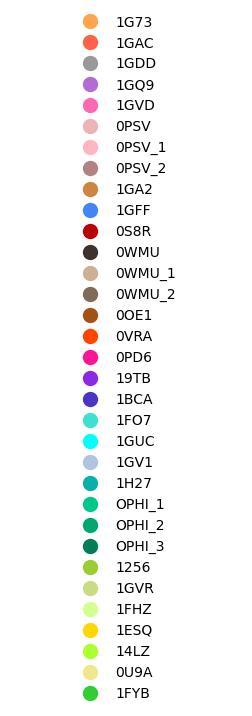

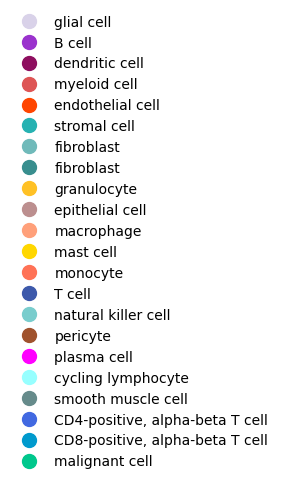

In [74]:
output_folder = Path(cfg['figures_dir']) / 'palettes'
palettes_dir = cfg['xenium_metadata_dir']
cell_type_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_cell_types_combo.csv')
sample_palette = Path('/work/PRTNR/CHUV/DIR/rgottar1/spatial/env/xenium_paper/data/xenium/metadata/col_palette_sample.csv')

dpi = 300

for color in ['sample', 'Level2.1']:

    if color in ["sample"]:
        palette_file = sample_palette
        palette = pd.read_csv(palette_file, index_col=0).iloc[:, 0]
    else:
        if color == "Level2.1":
            palette_file = cell_type_palette
            
            palette_lvl2 = pd.read_csv(cell_type_palette)[["Level2", "cols_Level2"]]
            palette_lvl2 = palette_lvl2.drop_duplicates().set_index("Level2").squeeze()

            palette = pd.read_csv(cell_type_palette)[[color, f"cols_{color}"]].drop_duplicates().set_index(color).squeeze()
            palette = palette[~palette.index.str.contains("malignant")]
            for k, v in palette_lvl2.items():
                if k not in palette.index:
                    palette[k] = palette_lvl2[k]
            palette = palette.reset_index().replace(r" of .+", "", regex=True).drop_duplicates().set_index(color).squeeze()

        else:
            palette = pd.read_csv(cell_type_palette)[[color, f"cols_{color}"]].drop_duplicates().set_index(color).squeeze()


    output_file = output_folder / f"{palette_file.stem}_{color}_legend.png"  # Save as PNG for better quality

    # Create circular legend handles
    handles = [mlines.Line2D([], [], color=v, marker='o', linestyle='None',
                            markersize=10, label=k) for k,v in palette.items()]

    # Create a figure and axis for the legend
    fig, ax = plt.subplots(figsize=(3, 2))  # Adjust figure size as needed
    ax.legend(handles=handles, loc='center', frameon=False)
    ax.axis('off')  # Hide axes

    # Save the legend
    output_file.parents[0].mkdir(parents=True, exist_ok=True)

    plt.savefig(output_file, bbox_inches='tight',dpi=dpi)  # Use bbox_inches='tight' to prevent labels from being cut off
    plt.show()  # Close the figure to free memory